In [792]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [793]:
df = pd.read_csv('來臺旅客按目的統計.csv')

# This data shows the reasons why people from different countries travel to Taiwan, as well as the number of visitors that travel for a certain reason.

# Source: Tourism Statistics Database of the Tourism Administration, MOTC: https://stat.taiwan.net.tw/introduction (Accessed April 20, 2025).

In [794]:
df.head(10)

,年別,月份,國家名稱,業務,觀光,探親,會議,求學,展覽,醫療,其他,小計
0,Years,Months,Countries,Business,Leisure,Visit Relatives,Conference,Study,Exhibition,Medical Treatment,Others,Total
1,97,1,亞洲地區(Asia),56086,116065,19421,2632,1060,0,0,42657,237921
2,97,1,日本(Japan),27111,61677,2262,554,235,0,0,6553,98392
3,97,1,韓國(Korea),5970,18968,3381,320,236,0,0,3869,32744
4,97,1,香港(Hong Kong),6614,16721,2254,474,92,0,0,2555,28710
5,97,1,澳門(Macao),71,879,142,12,34,0,0,240,1378
6,97,1,越南(Vietnam),465,82,1327,36,51,0,0,3995,5956
7,97,1,泰國(Thailand),799,738,739,67,30,0,0,4273,6646
8,97,1,馬來西亞(Malaysia),2034,3769,853,221,69,0,0,756,7702
9,97,1,新加坡(Singapore),4262,4865,832,267,38,0,0,1022,11286


In [795]:
df.tail(10)

,年別,月份,國家名稱,業務,觀光,探親,會議,求學,展覽,醫療,其他,小計
8192,114,1,挪威(Norway),40,183,25,2,3,0,0,57,310
8193,114,1,丹麥(Denmark),133,211,36,1,7,0,0,242,630
8194,114,1,愛爾蘭(Ireland),58,187,46,0,2,0,0,93,386
8195,114,1,冰島(Iceland),4,11,0,0,0,0,0,11,26
8196,114,1,葡萄牙(Portugal),27,104,20,1,1,0,2,91,246
8197,114,1,芬蘭(Finland),41,139,10,1,19,0,0,30,240
8198,114,1,奧地利(Austria),122,478,83,5,14,1,2,218,923
8199,114,1,希臘(Greece),29,35,6,0,2,0,1,52,125
8200,114,1,其他未列明(Unknow),1,31,14,0,0,0,0,151,197
8201,總計(Total),NaN,NaN,20954077,131632312,11279723,1661851,1583826,319167,556856,32638971,200626783


In [796]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8202 entries, 0 to 8201
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   年別      8202 non-null   object
 1   月份      8201 non-null   object
 2   國家名稱    8201 non-null   object
 3   業務      8202 non-null   object
 4   觀光      8202 non-null   object
 5   探親      8202 non-null   object
 6   會議      8202 non-null   object
 7   求學      8202 non-null   object
 8   展覽      8202 non-null   object
 9   醫療      8202 non-null   object
 10  其他      8202 non-null   object
 11  小計      8202 non-null   object
dtypes: object(12)
memory usage: 769.1+ KB


# Data Cleaning

In [797]:
# For this simple analysis, we will use fewer columns regarding the purpose of travel

df = df.drop(index=0)
df = df.dropna()  # Only last row has NaN values. Besides, this row is not useful due to the fact that considers the sum of Asia, Europe, Africa, America and Oceania when adding up all visitors from different countries (repetition)

# Make sure Pandas interprets the columns as desired
df = df.astype({'年別' : 'int', '月份' : 'int', '國家名稱' : 'string', '業務' : 'int', '觀光' : 'int', '探親' : 'int', '會議' : 'int', '求學' : 'int', '展覽' : 'int', '醫療' : 'int', '其他' : 'int', '小計' : 'int'})

df['其他'] = df['會議'] + df['展覽'] + df['醫療'] + df['其他']  # Let's consider a much simpler analysis only taking into consideration "Study", "Business", "Toursim" and "Visit Realtives" as reasons. This piece of code does not work well without the previous line. 

df = df[['年別', '月份', '國家名稱', '業務', '觀光', '探親', '求學', '其他', '小計']]

df = df.rename(columns={'年別' : 'Year', '月份' : 'Month', '國家名稱' : 'Country', '業務' : 'Business', '觀光' : 'Tourism', '探親' : 'Visit Relatives', '求學' : 'Study', '其他' : 'Other reasons', '小計' : 'Total'}) # Translation to English

df.head(10)

,Year,Month,Country,Business,Tourism,Visit Relatives,Study,Other reasons,Total
1,97,1,亞洲地區(Asia),56086,116065,19421,1060,45289,237921
2,97,1,日本(Japan),27111,61677,2262,235,7107,98392
3,97,1,韓國(Korea),5970,18968,3381,236,4189,32744
4,97,1,香港(Hong Kong),6614,16721,2254,92,3029,28710
5,97,1,澳門(Macao),71,879,142,34,252,1378
6,97,1,越南(Vietnam),465,82,1327,51,4031,5956
7,97,1,泰國(Thailand),799,738,739,30,4340,6646
8,97,1,馬來西亞(Malaysia),2034,3769,853,69,977,7702
9,97,1,新加坡(Singapore),4262,4865,832,38,1289,11286
10,97,1,菲律賓(Philippines),1685,503,682,40,4569,7479


In [798]:
df['Country'] = df['Country'].str.replace(r'^.*\((.*)\)$', r'\1', regex=True) # Translation to English

# Let's break down this line of code:

# A) r'^.*\((.*)\)$' has 5 parts: ^ indicates the beginning of the string, .* matches any character (except for line terminators) zero or more times, 
#                                   \( and \) match the literal characters "(" and ")", (.*) captures everything inside the parentheses, and $ indicates the end of the string.
#
# B) r'\1' writes what was captures in tne parentheses (.*)

df.head(10)

,Year,Month,Country,Business,Tourism,Visit Relatives,Study,Other reasons,Total
1,97,1,Asia,56086,116065,19421,1060,45289,237921
2,97,1,Japan,27111,61677,2262,235,7107,98392
3,97,1,Korea,5970,18968,3381,236,4189,32744
4,97,1,Hong Kong,6614,16721,2254,92,3029,28710
5,97,1,Macao,71,879,142,34,252,1378
6,97,1,Vietnam,465,82,1327,51,4031,5956
7,97,1,Thailand,799,738,739,30,4340,6646
8,97,1,Malaysia,2034,3769,853,69,977,7702
9,97,1,Singapore,4262,4865,832,38,1289,11286
10,97,1,Philippines,1685,503,682,40,4569,7479


In [799]:
Taiwan_to_Gregorian_year = {
    97 : 2008,
    98 : 2009,
    99 : 2010,
    100 : 2011,
    101 : 2012,
    102 : 2013,
    103 : 2014,
    104 : 2015,
    105 : 2016,
    106 : 2017,
    107 : 2018,
    108 : 2019,
    109 : 2020,
    110 : 2021,
    111 : 2022,
    112 : 2023,
    113 : 2024,
    114 : 2025
}

months = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}

def Taiwan_to_Gregorian(Taiwan_year):
    return Taiwan_to_Gregorian_year[Taiwan_year]

def Month_to_string(month):
    return months[month]

df['Year'] = df['Year'].apply(Taiwan_to_Gregorian)
df['Period'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)
df['Month'] = df['Month'].apply(Month_to_string)

df.head(10)

,Year,Month,Country,Business,Tourism,Visit Relatives,Study,Other reasons,Total,Period
1,2008,January,Asia,56086,116065,19421,1060,45289,237921,2008-01
2,2008,January,Japan,27111,61677,2262,235,7107,98392,2008-01
3,2008,January,Korea,5970,18968,3381,236,4189,32744,2008-01
4,2008,January,Hong Kong,6614,16721,2254,92,3029,28710,2008-01
5,2008,January,Macao,71,879,142,34,252,1378,2008-01
6,2008,January,Vietnam,465,82,1327,51,4031,5956,2008-01
7,2008,January,Thailand,799,738,739,30,4340,6646,2008-01
8,2008,January,Malaysia,2034,3769,853,69,977,7702,2008-01
9,2008,January,Singapore,4262,4865,832,38,1289,11286,2008-01
10,2008,January,Philippines,1685,503,682,40,4569,7479,2008-01


In [800]:
df['Region'] = df['Country'].where(df['Country'].isin(['Asia', 'Europe', 'Americas', 'Africa', 'Oceania', 'Unknow']))
df['Region'] = df['Region'].ffill()  # Adds a column indicating in which continent a certain country is located

df = df.sort_values(by='Period', ascending=True)
df = df[['Period','Year', 'Month', 'Country', 'Region', 'Business', 'Tourism', 'Study', 'Visit Relatives', 'Other reasons', 'Total']]
df = df[df['Year'] != 2025] # 2025 has only data for a few months, we will not consider that year.

In [801]:
resume_asia_df = df[df['Country'] == 'Asia']
resume_europe_df = df[df['Country'] == 'Europe']
resume_america_df = df[df['Country'] == 'Americas']
resume_africa_df = df[df['Country'] == 'Africa']
resume_oceania_df = df[df['Country'] == 'Oceania']
resume_unknown_df = df[df['Country'] == 'Unknow']

df = df[~df['Country'].isin(['Asia', 'Europe', 'Americas', 'Africa', 'Oceania', 'Unknow'])]

df.head(10)

,Period,Year,Month,Country,Region,Business,Tourism,Study,Visit Relatives,Other reasons,Total
23,2008-01,2008,January,Belgium,Europe,200,35,7,32,47,321
24,2008-01,2008,January,France,Europe,1145,260,57,275,183,1920
25,2008-01,2008,January,Germany,Europe,2117,301,25,455,295,3193
26,2008-01,2008,January,Italy,Europe,529,113,7,85,115,849
27,2008-01,2008,January,Netherlands,Europe,678,181,17,85,93,1054
28,2008-01,2008,January,U.K.,Europe,1994,993,29,349,347,3712
29,2008-01,2008,January,Spain,Europe,207,44,10,64,47,372
31,2008-01,2008,January,Switzerland,Europe,305,57,3,69,44,478
32,2008-01,2008,January,Norway,Europe,79,46,2,21,15,163
33,2008-01,2008,January,Denmark,Europe,225,34,10,26,19,314


# Data analysis

### Which percentage of travellers come from Europe?

In [802]:
aggregated_asian_visitors = resume_asia_df['Total'].sum()
aggregated_european_visitors = resume_europe_df['Total'].sum()
aggregated_american_visitors = resume_america_df['Total'].sum()
aggregated_african_visitors = resume_africa_df['Total'].sum()
aggregated_oceanian_visitors = resume_oceania_df['Total'].sum()
aggregated_unknown_visitors = resume_unknown_df['Total'].sum()

total_visitors = aggregated_asian_visitors + aggregated_european_visitors + aggregated_american_visitors + aggregated_african_visitors + aggregated_oceanian_visitors + aggregated_unknown_visitors

percentage_asian = aggregated_asian_visitors/total_visitors * 100
percentage_european = aggregated_european_visitors/total_visitors * 100
percentage_american = aggregated_american_visitors/total_visitors * 100
percentage_african = aggregated_african_visitors/total_visitors * 100
percentage_oceanian = aggregated_oceanian_visitors/total_visitors * 100
percentage_unknown = aggregated_unknown_visitors/total_visitors * 100

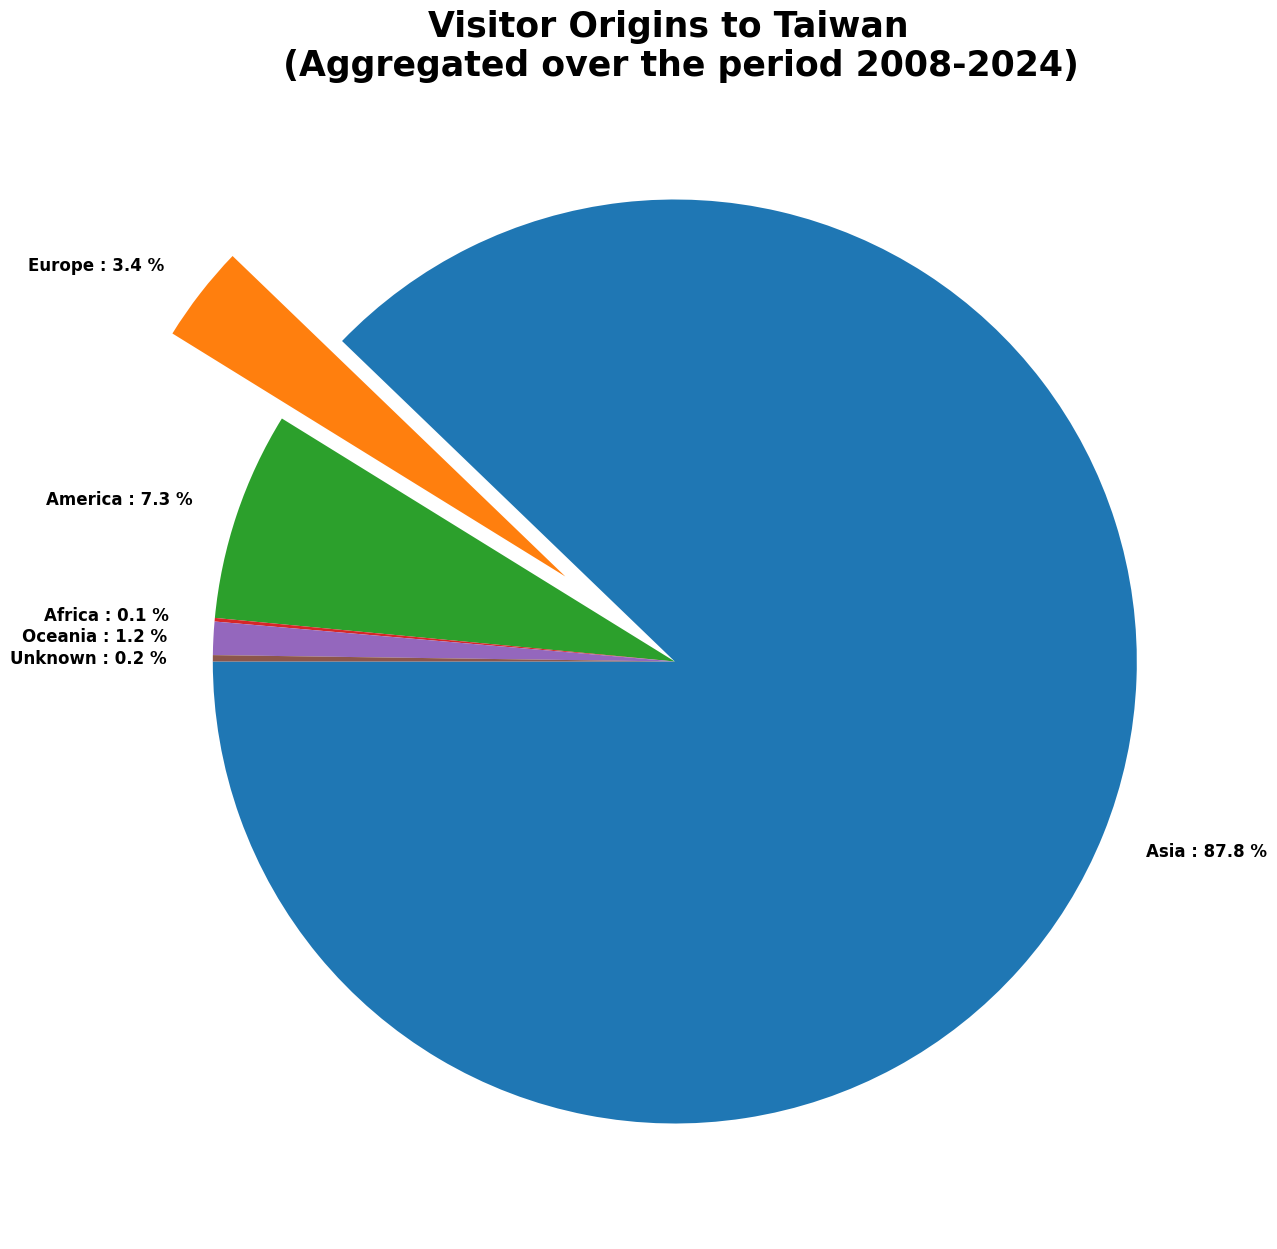

In [803]:
labels = [f'Asia : {round(percentage_asian,1)} %', f'Europe : {round(percentage_european,1)} %', f'America : {round(percentage_american,1)} %',
          f'Africa : {round(percentage_african,1)} %', f'Oceania : {round(percentage_oceanian,1)} %', f'Unknown : {round(percentage_unknown,1)} %']

plt.figure(figsize=(15,15))
plt.pie([percentage_asian, percentage_european, percentage_american, percentage_african, percentage_oceanian, percentage_unknown],labels=labels, textprops={'color': 'black', 'fontsize': 12, 'weight': 'bold'}, explode=(0, 0.3, 0, 0, 0, 0), startangle=180)
plt.title('Visitor Origins to Taiwan \n (Aggregated over the period 2008-2024)', fontweight='bold', fontsize=25)
plt.show()

### How many european travellers come from Spain?

In [804]:
european_visitors_by_country = df[df['Region'] == 'Europe']
european_visitors_by_country.head(10)

,Period,Year,Month,Country,Region,Business,Tourism,Study,Visit Relatives,Other reasons,Total
23,2008-01,2008,January,Belgium,Europe,200,35,7,32,47,321
24,2008-01,2008,January,France,Europe,1145,260,57,275,183,1920
25,2008-01,2008,January,Germany,Europe,2117,301,25,455,295,3193
26,2008-01,2008,January,Italy,Europe,529,113,7,85,115,849
27,2008-01,2008,January,Netherlands,Europe,678,181,17,85,93,1054
28,2008-01,2008,January,U.K.,Europe,1994,993,29,349,347,3712
29,2008-01,2008,January,Spain,Europe,207,44,10,64,47,372
31,2008-01,2008,January,Switzerland,Europe,305,57,3,69,44,478
32,2008-01,2008,January,Norway,Europe,79,46,2,21,15,163
33,2008-01,2008,January,Denmark,Europe,225,34,10,26,19,314


In [805]:
countries = []
number_visitors = []
percentage = []

for country in european_visitors_by_country['Country'].unique():
    total = european_visitors_by_country[european_visitors_by_country['Country'] == country]['Total'].sum()
    per = round(total/aggregated_european_visitors *100,1)
    if per > 2.5:  # In order to make the pie chart more visual, those country who represent less that 2.5% of the total of European travelers will be included in "Others"
        percentage.append(per)
        countries.append(country)
        number_visitors.append(total)

countries.append('Rest of EU (<2.5% per country)')
percentage.append(round((aggregated_european_visitors - sum(number_visitors))/aggregated_european_visitors *100,1)) # Important to calculate teh percentage first in order to obtain the desired result
number_visitors.append(aggregated_european_visitors - sum(number_visitors))

europe_data = pd.DataFrame(data={'Country' : countries, 'Number of visitors' : number_visitors, 'Percentage' : percentage})

europe_data =  europe_data.sort_values(by='Percentage', ascending=False)

europe_data

,Country,Number of visitors,Percentage
8,Rest of EU (<2.5% per country),924904,23.4
4,U.K.,813140,20.6
1,Germany,786292,19.9
0,France,554403,14.0
3,Netherlands,282885,7.2
2,Italy,219036,5.5
5,Spain,130305,3.3
6,Switzerland,130435,3.3
7,Sweden,109629,2.8


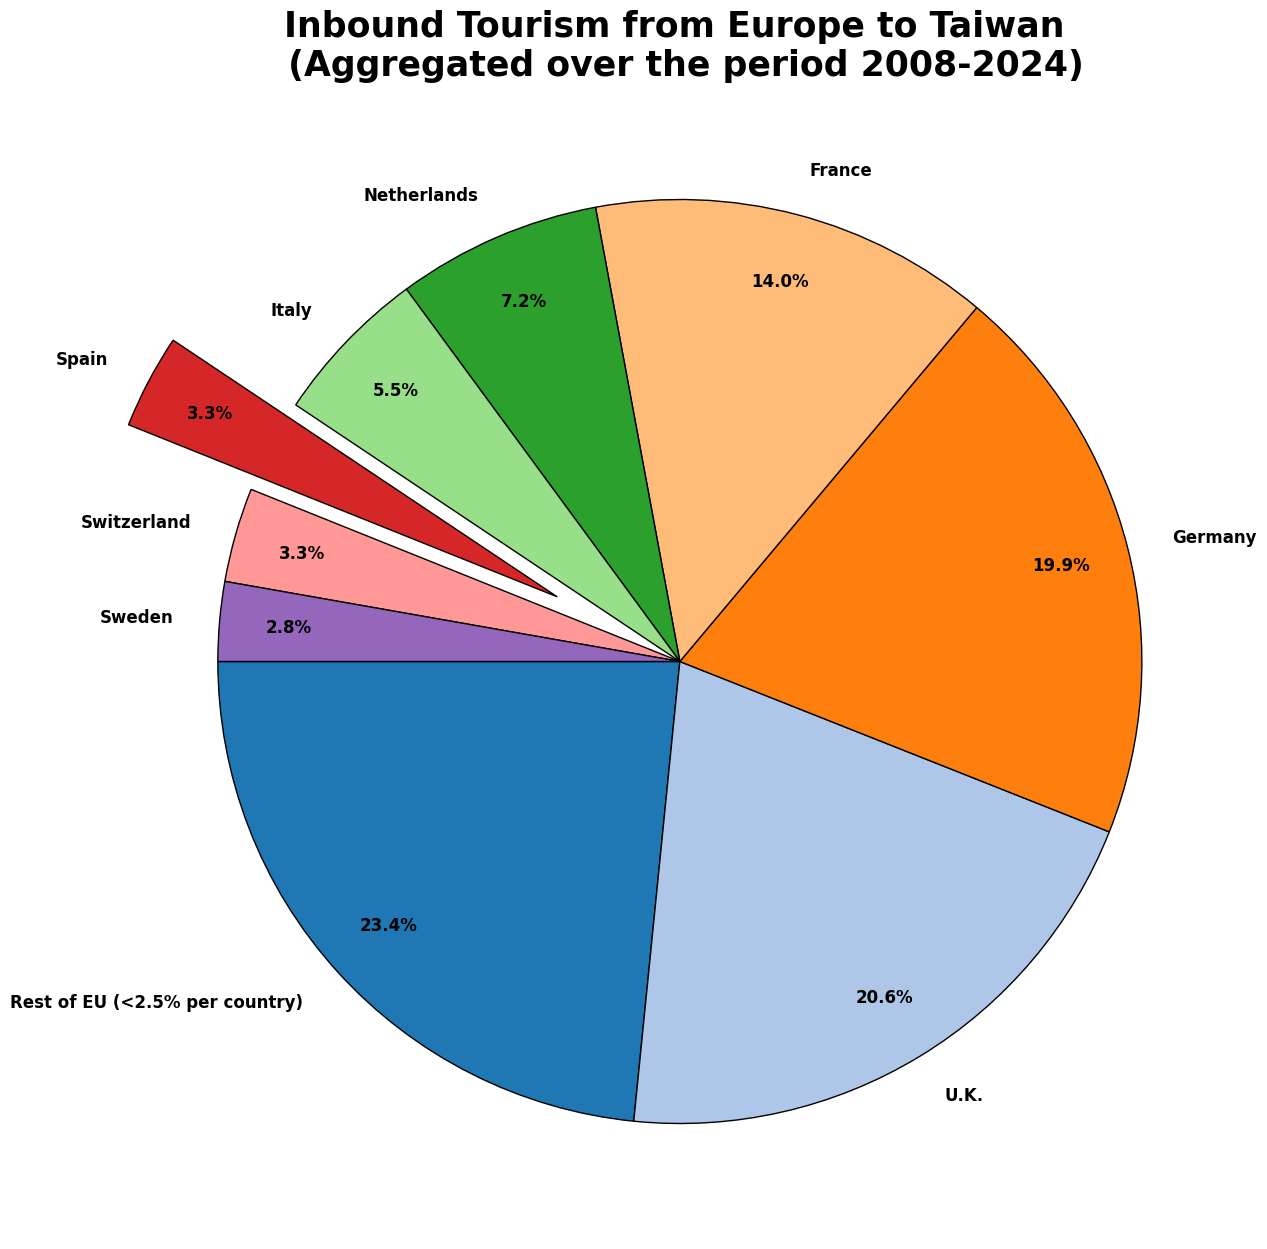

In [806]:
labels = europe_data['Country']

colors = plt.cm.tab20(range(len(countries))) 

plt.figure(figsize=(15,15))
plt.pie(europe_data['Number of visitors'],labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85, textprops={'color': 'black', 'fontsize': 12, 'weight': 'bold'}, explode=(0,0,0,0,0,0,0.3,0,0), startangle=180, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Inbound Tourism from Europe to Taiwan \n (Aggregated over the period 2008-2024)', fontweight='bold', fontsize=25)
plt.savefig('Taiwan visitors from Europe.png', dpi=600)
plt.show()

### Which fraction of Spaniards study in Taiwan?

In [807]:
spain_visitors = european_visitors_by_country[european_visitors_by_country['Country'] == 'Spain']

spain_visitors.head(10)

,Period,Year,Month,Country,Region,Business,Tourism,Study,Visit Relatives,Other reasons,Total
29,2008-01,2008,January,Spain,Europe,207,44,10,64,47,372
69,2008-02,2008,February,Spain,Europe,155,45,16,44,53,313
109,2008-03,2008,March,Spain,Europe,275,84,6,63,95,523
149,2008-04,2008,April,Spain,Europe,289,61,9,51,58,468
189,2008-05,2008,May,Spain,Europe,186,67,15,31,57,356
229,2008-06,2008,June,Spain,Europe,273,64,20,61,203,621
269,2008-07,2008,July,Spain,Europe,189,79,16,86,65,435
309,2008-08,2008,August,Spain,Europe,108,129,11,78,53,379
349,2008-09,2008,September,Spain,Europe,180,69,28,47,63,387
389,2008-10,2008,October,Spain,Europe,289,123,14,52,172,650


In [808]:
percentage_study = spain_visitors['Study'].sum()/spain_visitors['Total'].sum() * 100
percentage_business = spain_visitors['Business'].sum()/spain_visitors['Total'].sum() * 100
percentage_tourism = spain_visitors['Tourism'].sum()/spain_visitors['Total'].sum() * 100
percentage_visit_relatives = spain_visitors['Visit Relatives'].sum()/spain_visitors['Total'].sum() * 100
percentage_other = spain_visitors['Other reasons'].sum()/spain_visitors['Total'].sum() * 100

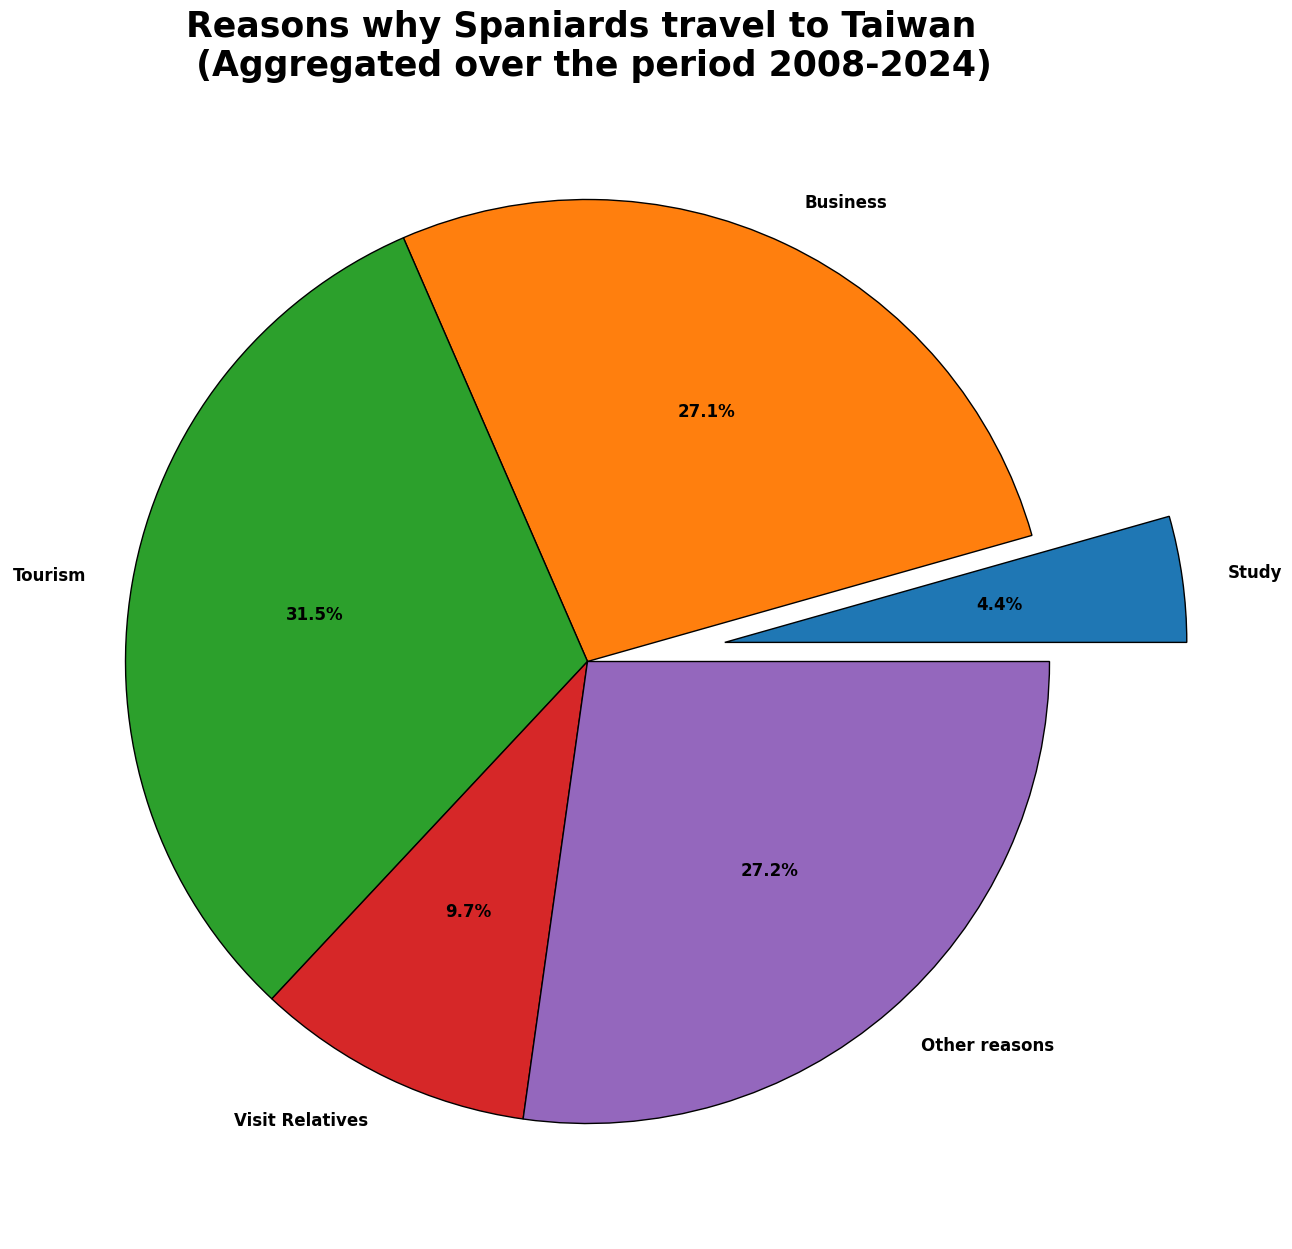

In [809]:
labels = ['Study', 'Business', 'Tourism', 'Visit Relatives', 'Other reasons']

plt.figure(figsize=(15,15))
plt.pie([percentage_study, percentage_business, percentage_tourism,percentage_visit_relatives, percentage_other],labels=labels, autopct='%1.1f%%', textprops={'color': 'black', 'fontsize': 12, 'weight': 'bold'}, explode=(0.3,0,0,0,0),startangle=0,  wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Reasons why Spaniards travel to Taiwan \n (Aggregated over the period 2008-2024)', fontweight='bold', fontsize=25)
plt.savefig('Taiwan visitors from Spain.png', dpi=600)
plt.show()

## Other studies

### How did COVID-19 affect Taiwan's tourism?

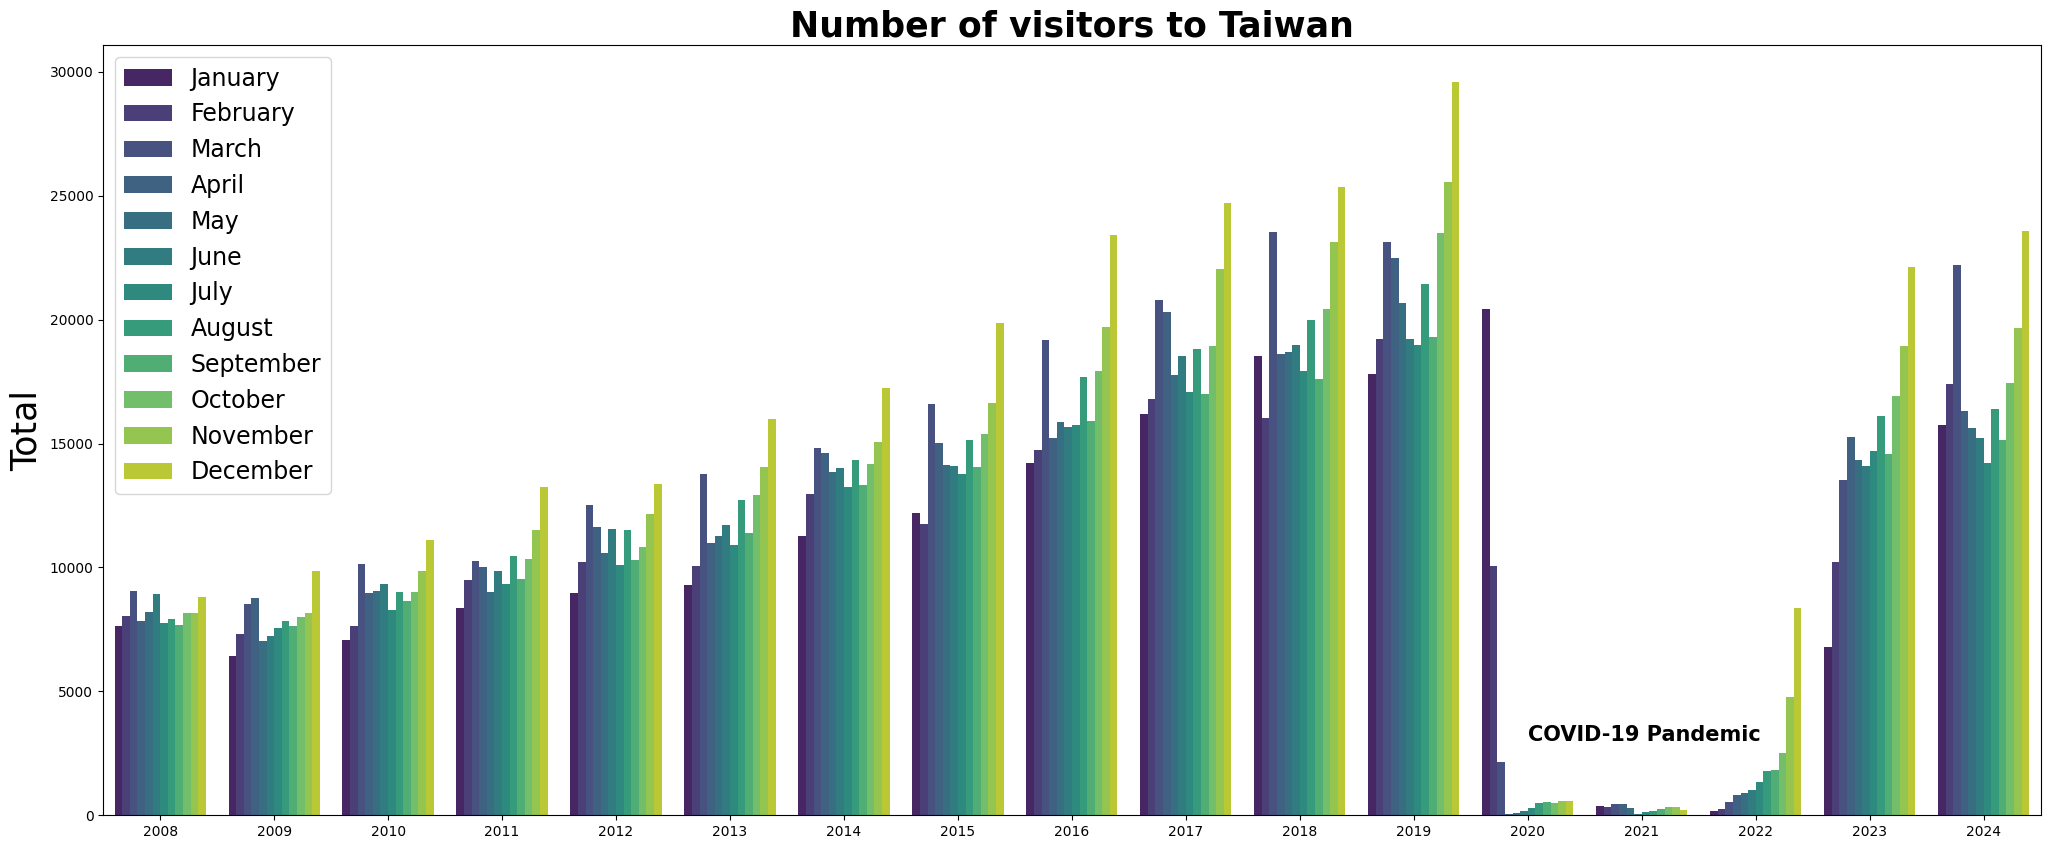

In [810]:
plt.figure(figsize=(25,10))
sns.barplot(data=df, x='Year', y='Total', errorbar=None, hue='Month', palette='viridis')
plt.legend(loc=2, fontsize=17)
plt.ylabel('Total', fontsize=25)
plt.xlabel('')
plt.title('Number of visitors to Taiwan', fontsize=25, fontweight='bold')
plt.text('2020', 3000, 'COVID-19 Pandemic', fontsize=15, fontweight='bold')
plt.show()